# Import Packages

In [2]:
%pip install geopandas
%pip install matplotlib.pyplot
%pip install numpy
%pip install shapely.geometry

     |████████████████████████████████| 994 kB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 6.6 MB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 23.4 MB/s eta 0:00:01
     |████████████████████████████████| 15.4 MB 12.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement shapely.geometry (from versions: none)
ERROR: No matching distribution found for shapely.geometry
Note: you may need to restart the kernel to use updated packages.


In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon

# Import Shapefile and Show Data

In [ ]:
# Geopandas offers the most straighforward approach to importing geospatial data
# Be sure that all necessary files are in the same folder as the .shp

In [4]:
Points_Shape = gpd.read_file("Data/Shapefiles/Points.shp")
Lines_Shape = gpd.read_file("Data/Shapefiles/Lines.shp")
Polygons_Shape = gpd.read_file("Data/Shapefiles/Polygons.shp")

In [5]:
type(Points_Shape)
# Type shows that this is a geodataframe

geopandas.geodataframe.GeoDataFrame

In [6]:
Points_Shape.head()
# This shows that the the geospatial data has some basic attributes attached to it, numerical ID in this case

,ID,geometry
0,7,POINT (-4.67415 57.32240)
1,8,POINT (-6.57746 58.18926)
2,3,POINT (-5.96210 55.91855)
3,4,POINT (-6.79427 54.72280)
4,6,POINT (-3.07777 56.04782)


In [7]:
Points_Shape.crs
# Information regarding the CRS can be generated using .crs
# CRS can be changed using .to_crs()

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Plot Basic Shapefiles

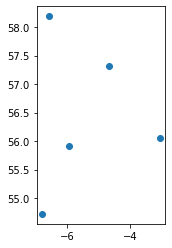

In [8]:
Points_Shape.plot()
# The basic plot fucntion in geopandas can very easily generate a plot based on the geospatial information

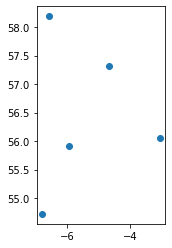

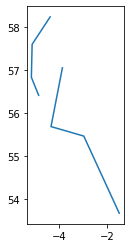

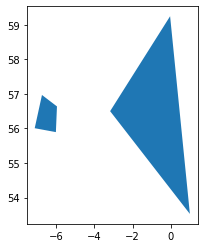

In [9]:
Points_Shape.plot()
Lines_Shape.plot()
Polygons_Shape.plot()
# Multiple plots can be added at once

In [ ]:
# They can also be overlayed on top of one another
Basic_shapes = Polygons_Shape.boundary.plot(figsize=(18, 12), color='Black', linewidth=.5)
Points_Shape.plot(ax=Basic_shapes, markersize=50, color='Red')
Lines_Shape.plot(ax=Basic_shapes, color="Yellow")
Shapes_out = Polygons_Shape.plot(ax=Basic_shapes, color="Green")
# ax sets the axes on which the plots will be displayed, in this case on the boundary of the polygons extent (Basic_shapes)

# Real World Data

In [ ]:
# Lets add some more recognisable shapefiles, in this case, Scotland
Scot_plot = gpd.read_file("Data/Shapefiles/Scotland.shp")
Scot_map = Scot_plot.boundary.plot(figsize=(18, 12), color='Black', linewidth=.5)
Points_Shape.plot(ax=Scot_map, markersize=50, color='Red')
Lines_Shape.plot(ax=Scot_map, color="Yellow")
Scot_shapes = Polygons_Shape.plot(ax=Scot_map, color="Green")

In [ ]:
# With this we can see that these basic shapes have geographical data associted with them, tying them to real geographical locations
Scot_plot.geometry.total_bounds

In [ ]:
Scot_plot.crs

In [ ]:
# Now lets add the rest of the UK constituencies to the plot
Constits = gpd.read_file("Data/Shapefiles/Constituencies.shp")
Constits_map = Constits.boundary.plot(figsize=(18, 12), color='Black', linewidth=.5)
Scot_plot.plot(ax=Constits_map)
Constits_map = Constits.plot(ax=Constits_map)
# Note that the constituencies and Scotland hapefile are both in this plot

In [ ]:
# We can also zoom in, adjusting the extent by setting an x and y limit based on the extent of a specific shapefile
fig, ax = plt.subplots(figsize = (10,6))
xlim = ([Scot_plot.total_bounds[0],  Scot_plot.total_bounds[2]])
ylim = ([Scot_plot.total_bounds[1],  Scot_plot.total_bounds[3]])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
Constits.plot(ax=ax)
Constits.boundary.plot(color='black', linewidth=0.5, ax=ax)



In [ ]:
Constits.boundary.plot(figsize=(18, 12), color='Black', linewidth=.5)
# It can also be plotted without a fill

# Greater Customisation and Visualisation

In [ ]:
# These maps are fine, but not very colourful
Constits.plot(cmap='viridis', figsize=(18,16))
# viridis offers a default colour map, but there are many other options, see:
# "https://matplotlib.org/stable/tutorials/colors/colormaps.html"
# figsize simply sets the size of the output, this does not affect the data itself in any way

In [ ]:
# We can also colour these based on attributes, by using column, and adding a legend
Constits.plot(figsize=(18,16), column='country_na', legend='True')

In [ ]:
# Colour can also be changed based on attributes. Lets make some variables for each country of the UK
Eng = Constits[Constits['country_na'].isin(['England'])]
Scot = Constits[Constits['country_na'].isin(['Scotland'])]
Wales = Constits[Constits['country_na'].isin(['Wales'])]
N_Ire = Constits[Constits['country_na'].isin(['Northern Ireland'])]

In [ ]:
# Now we can plot each on top of the other, with different colours
UK_Map = Constits.boundary.plot(figsize=(18, 12), color='Black', linewidth=.5)
Eng.plot(ax=UK_Map,  color="Red")
Scot.plot(ax=UK_Map, color="Blue")
Wales.plot(ax=UK_Map, color="Orange")
final_map = N_Ire.plot(ax=UK_Map, color="Green")

# Adding Additional Attributes

In [ ]:
# With more attributes linked to our geographic data, we have even greater scope for visualisation
Elec = pd.read_csv('Data/csv/Election_Results.csv')

In [ ]:
Elec.head()

In [ ]:
# With this we combine the geodataframe with the data from Elec
merged = Constits.set_index('pconname').join(Elec.set_index('constituency_name'))

In [ ]:
merged.head()

# Labels

In [ ]:
fig, ax = plt.subplots(figsize = (20,20))
merged.apply(lambda x: ax.annotate(text=x.turnout, xy=x.geometry.centroid.coords[0], ha='center', fontsize=5, backgroundcolor="black", color="White"),axis=1);
merged.boundary.plot(ax=ax, color="Black", linewidth=0.5)
Eng.plot(ax=ax,  color="Red")
Scot.plot(ax=ax, color="Blue")
Wales.plot(ax=ax, color="Orange")
N_Ire.plot(ax=ax, color="Green")
# Annotate allows text to be added, and further detail can be plotted over this with various parameters
# Though with so many different small constituencies, this specific labeling is not particularly helpful...

In [ ]:
# Let's try an example with Scotland isolated

In [ ]:
fig, ax = plt.subplots(figsize = (20,20))
Scot_plot.apply(lambda x: ax.annotate(text=x.pconname, xy=x.geometry.centroid.coords[0], ha='center', fontsize=5, backgroundcolor="yellow", color="black"),axis=1);
Scot_plot.boundary.plot(ax=ax, color="Black", linewidth=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# Labels can be added to the axes using x and y label

# Plot New Attributes

In [ ]:
# Rather than simply labeling with the new attributes, we can have more meaningful visualisations
merged.plot(column='first_party', cmap='Pastel2', linewidth=0.8, edgecolor='Black', figsize=(18, 12))

In [ ]:
# We can use some more appropriate colours for this visualisation based on winning parties in each constituency
Con = merged[merged['first_party'].isin(['Con'])]
Lab = merged[merged['first_party'].isin(['Lab'])]
SNP = merged[merged['first_party'].isin(['SNP'])]
LD = merged[merged['first_party'].isin(['LD'])]
DUP = merged[merged['first_party'].isin(['DUP'])]
PC = merged[merged['first_party'].isin(['PC'])]
Green = merged[merged['first_party'].isin(['Green'])]
SF = merged[merged['first_party'].isin(['SF'])]
SDLP = merged[merged['first_party'].isin(['SDLP'])]
UUP = merged[merged['first_party'].isin(['UUP'])]
Ind = merged[merged['first_party'].isin(['Ind'])]
UKIP = merged[merged['first_party'].isin(['UKIP'])]
Spk = merged[merged['first_party'].isin(['Spk'])]

In [ ]:
UK_part_map = merged.boundary.plot(figsize=(18, 16), color='Black', linewidth=.5)
Con.plot(ax=UK_part_map, color="#0087DC")
Lab.plot(ax=UK_part_map, color="#E4003B")
SNP.plot(ax=UK_part_map, color="#FDF38E")
LD.plot(ax=UK_part_map, color="#FAA61A")
DUP.plot(ax=UK_part_map, color="#D46A4C")
PC.plot(ax=UK_part_map, color="#005B54")
Green.plot(ax=UK_part_map, color="#528D6B")
SF.plot(ax=UK_part_map, color="#326760")
SDLP.plot(ax=UK_part_map, color="#2AA82C")
UUP.plot(ax=UK_part_map, color="#48A5EE")
Ind.plot(ax=UK_part_map, color="#DDDDDD")
UKIP.plot(ax=UK_part_map, color="#70147A")
final_map = Spk.plot(ax=UK_part_map, color="white")

# Combining Plots

In [ ]:
# Two (or more) separate plots can be alligned next to one another for easier comparison
# Subplots can be used for this. The (121) arguments shows that there is 1 row, 2 columns and the current axis is plot 1

fig = plt.figure(figsize=(20,20))
fig.suptitle('UK General Election 2015 Results and Turnout', fontsize=40)
ax1 = fig.add_subplot(121)

ax1.set_title('2015 Election Results', fontdict={'fontsize': '25', 'fontweight' : '3'})

merged.boundary.plot(ax=ax1,color='Black', linewidth=.5)
Con.plot(ax=ax1, color="#0087DC")
Lab.plot(ax=ax1, color="#E4003B")
SNP.plot(ax=ax1, color="#FDF38E")
LD.plot(ax=ax1, color="#FAA61A")
DUP.plot(ax=ax1, color="#D46A4C")
PC.plot(ax=ax1, color="#005B54")
Green.plot(ax=ax1, color="#528D6B")
SF.plot(ax=ax1, color="#326760")
SDLP.plot(ax=ax1, color="#2AA82C")
UUP.plot(ax=ax1, color="#48A5EE")
Ind.plot(ax=ax1, color="#DDDDDD")
UKIP.plot(ax=ax1, color="#70147A")
Spk.plot(ax=ax1, color="white")

ax2 = fig.add_subplot(122)
ax2.set_title('2015 Election Turnout', fontdict={'fontsize': '25', 'fontweight' : '3'})
merged.plot(column='turnout', cmap='OrRd_r', linewidth=0.5, edgecolor='Black', figsize=(18, 12), ax=ax2, legend='True', legend_kwds={'label': "Turnout (%)"})

In [ ]:
# Titles and legends can be added for the entire plot (fig.) or for the specific plots (ax1./ax2. etc.)

In [ ]:
# Overlaying additional shapefiles in different formats (in this case Cities points) is straightforward
# Two (or more) separate plots can be alligned next to one another for easier comparison
# Subplots can be used for this. The (121) arguments shows that there is 1 row, 2 columns and the current axis is plot 1
Cities = gpd.read_file("Data/Shapefiles/Cities.shp")

fig = plt.figure(figsize=(20,20))
fig.suptitle('UK General Election 2015 Results and Turnout', fontsize=40)

ax1 = fig.add_subplot(121)

ax1.set_title('2015 Election Results', fontdict={'fontsize': '25', 'fontweight' : '3'})

merged.boundary.plot(ax=ax1,color='Black', linewidth=.5)
Con.plot(ax=ax1, color="#0087DC")
Lab.plot(ax=ax1, color="#E4003B")
SNP.plot(ax=ax1, color="#FDF38E")
LD.plot(ax=ax1, color="#FAA61A")
DUP.plot(ax=ax1, color="#D46A4C")
PC.plot(ax=ax1, color="#005B54")
Green.plot(ax=ax1, color="#528D6B")
SF.plot(ax=ax1, color="#326760")
SDLP.plot(ax=ax1, color="#2AA82C")
UUP.plot(ax=ax1, color="#48A5EE")
Ind.plot(ax=ax1, color="#DDDDDD")
UKIP.plot(ax=ax1, color="#70147A")
Spk.plot(ax=ax1, color="white")
Cities.plot(ax=ax1, color="black")
plt.xlabel('Longitude')
plt.ylabel('Latitude')

ax2 = fig.add_subplot(122)
ax2.set_title('2015 Election Turnout', fontdict={'fontsize': '25', 'fontweight' : '3'})
merged.plot(column='turnout', cmap='OrRd_r', linewidth=0.5, edgecolor='Black', figsize=(18, 12), ax=ax2, legend='True', legend_kwds={'label': "Turnout (%)"})
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Exporting Plots

In [ ]:
# Plots can be exported as various different formats using .savefig()
# This can be used in conjuction with, or instead of visualising the plot
fig, ax = plt.subplots(figsize = (20,20))

ax.set_title('2015 Election Results', fontdict={'fontsize': '25', 'fontweight' : '3'})

merged.boundary.plot(ax=ax,color='Black', linewidth=.5)
Con.plot(ax=ax, color="#0087DC")
Lab.plot(ax=ax, color="#E4003B")
SNP.plot(ax=ax, color="#FDF38E")
LD.plot(ax=ax, color="#FAA61A")
DUP.plot(ax=ax, color="#D46A4C")
PC.plot(ax=ax, color="#005B54")
Green.plot(ax=ax, color="#528D6B")
SF.plot(ax=ax, color="#326760")
SDLP.plot(ax=ax, color="#2AA82C")
UUP.plot(ax=ax, color="#48A5EE")
Ind.plot(ax=ax, color="#DDDDDD")
UKIP.plot(ax=ax, color="#70147A")
Spk.plot(ax=ax, color="white")
Cities.plot(ax=ax, color="black")
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig('Output/Results.png')

In [ ]:
# .savefig() has additional options for the desired output

fig, ax = plt.subplots(figsize = (20,20))
ax.set_title('2015 Election Turnout', fontdict={'fontsize': '25', 'fontweight' : '3'})
merged.plot(column='turnout', cmap='OrRd_r', linewidth=0.5, edgecolor='Black', figsize=(18, 12), ax=ax, legend='True', legend_kwds={'label': "Turnout (%)"})
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig('Output/Turnout.jpg', dpi=30, transparent='True', bbox_inches='tight')

In [ ]:
# There is much more to Geographical Data with Python, but hopefully with these basics, you will be able to find suitable methods and outputs for your own research